In [1]:
########## PACKAGES ############

import os #Allows us to get operating system information in python.
#In artemis video, he did not import os package

#Data Handling
import pandas as pd, numpy as np

#Plotting
import matplotlib.pyplot as plt, seaborn as sns

#Saving data
import pickle

In [2]:
OGdata = pd.read_csv('onlinefraud.csv') #read in the dataset
# OGdata.head() #Check what the top of the dataset looks like
# OGdata['isFraud'].value_counts(normalize=True)

In [3]:
#Dropping isFlaggedFraud because it doesn't need to be in the dataset
OGdata.drop('isFlaggedFraud', inplace=True, axis=1)


In [4]:
#data_types = OGdata.dtypes.to_frame() #Grab the data types from df
#data_types #display them

#Create a dictionary that tells us what data type we want to change each column to
#NOTE: most of them will stay the same, except the last two columns
dictionary_cols = {'step':'int64','type':'object','amount':'float64',
                      'nameOrig':'object','oldbalanceOrg':'float64','newbalanceOrig':'float64',
                      'nameDest':'object', 'oldbalanceDest':'float64', 'newbalanceDest':'float64',
                      'isFraud':'boolean'}
data = OGdata.astype(dictionary_cols) #Change the data types to the dictionary definitions
data.head(10) #Check head of data again to see what has changed

# data['isFraud'].value_counts(normalize=True) 
#We still get the same breakdown of NF v F so the conversion worked
#data['isFraud'].value_counts()

# False    0.998709
# True     0.001291

#data.loc[data.isFraud == True].shape (8213,10)
#data.loc[data.isFraud == False].shape (6354407,10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,True
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,True
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,False
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,False
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,False
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,False
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,False
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,False


In [6]:
data.shape

(6362620, 10)

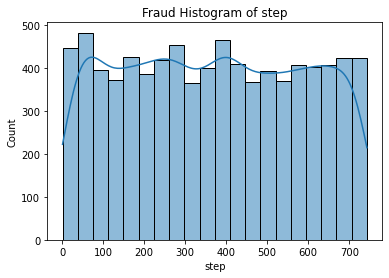

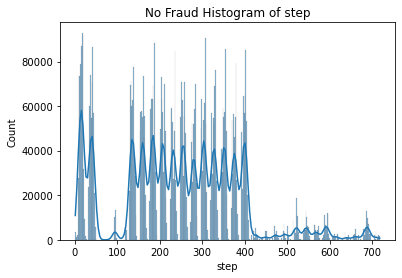

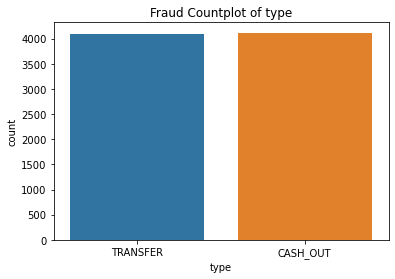

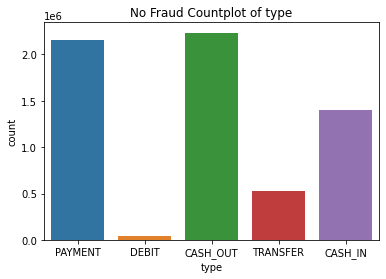

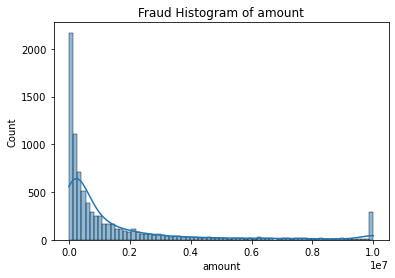

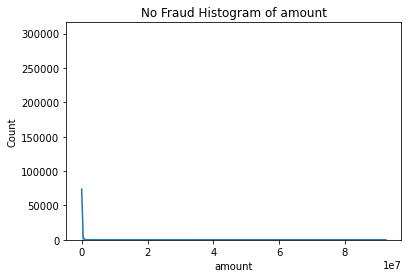

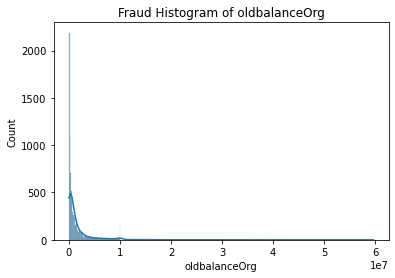

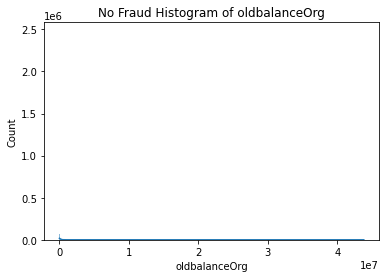

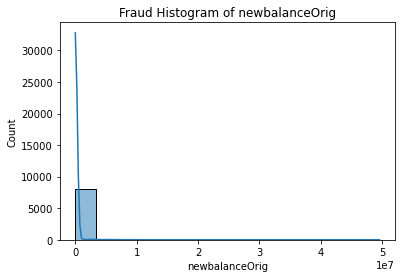

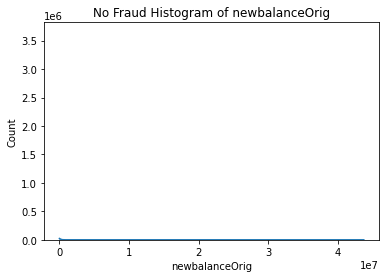

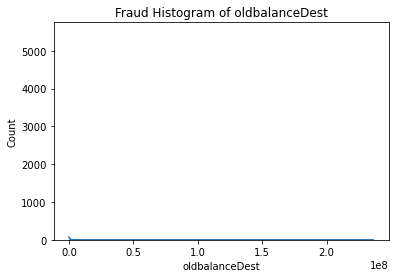

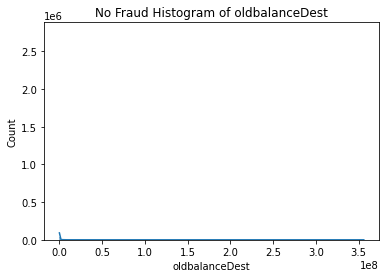

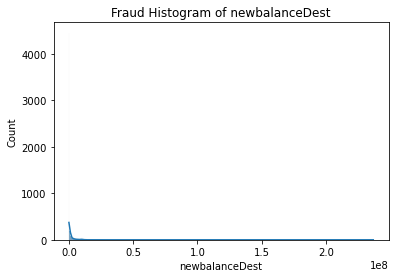

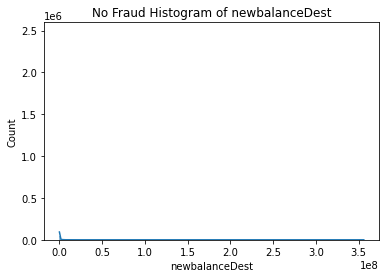

In [5]:
#Create two distinct datasets of Fraud and No Fraud
dataminus = data.loc[:,~data.columns.isin(['nameOrig','nameDest'])] #useless to load these plots
dataF = dataminus.loc[data.isFraud == True]
dataNF = dataminus.loc[data.isFraud == False]
#Plot the distributions of categorical and numerical variables
for col in [x for x in dataminus.columns if (x != 'isFraud')]:
    if data[col].dtype in ['int64','float64']:
        #sns.set_palette('Set3')
        sns.histplot(data=dataF,x=col,kde=True).set(title='Fraud Histogram of {}'.format(str(col)))
        plt.show()
        #sns.set_palette('hls')
        sns.histplot(data=dataNF,x=col,kde=True).set(title='No Fraud Histogram of {}'.format(str(col)))
        plt.show()
    else:
        sns.countplot(data=dataF, x=col).set(title='Fraud Countplot of {}'.format(str(col)))
        plt.show()
        sns.countplot(data=dataNF, x=col).set(title='No Fraud Countplot of {}'.format(str(col)))
        plt.show()


In [15]:
#Create tables to better understand the breakdown for each 
dataminus = data.loc[:,~data.columns.isin(['nameOrig','nameDest'])] #Repeated this command so this code cell can stand alone
for col in dataminus.columns:
    print("===== {} =====".format(col))
    if dataminus[col].dtype == 'object':
        print(dataminus.pivot_table(index=['isFraud'], columns=col, aggfunc='size', fill_value=0))
        print()
    else:
        print(dataminus[col].describe().T)
        print()

===== step =====
count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64

===== type =====
type     CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
isFraud                                             
False    1399284   2233384  41432  2151495    528812
True           0      4116      0        0      4097

===== amount =====
count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

===== oldbalanceOrg =====
count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

===== newbalanceOrig =====
count    6.362620e+06
mean     8.551137e+05
std      2.924

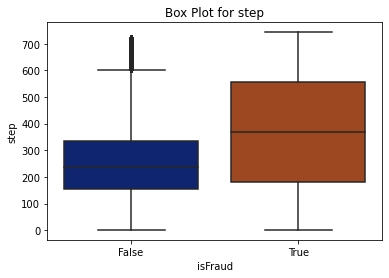

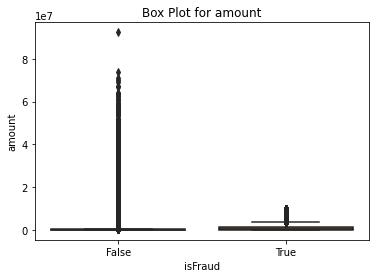

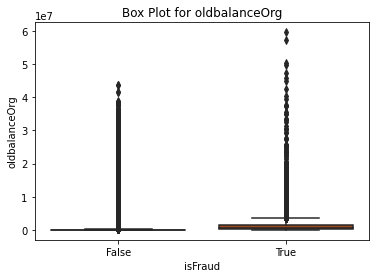

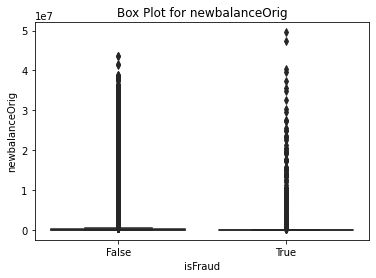

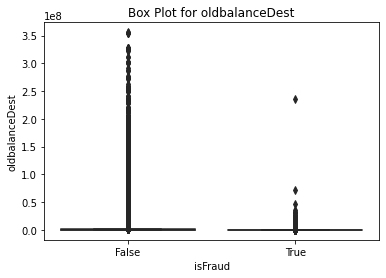

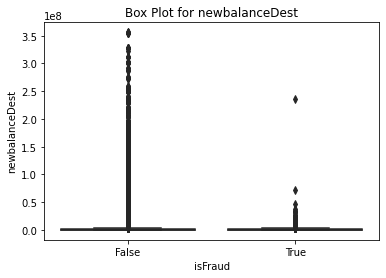

In [18]:
#BOX PLOTS
data_numonly = data.loc[:,~data.columns.isin(['type','nameOrig','nameDest'])]
for col in data_numonly.columns:
    if not 'isFraud' in str(col):
        sns.boxplot(data=data_numonly,x='isFraud',y=col,palette='dark').set(title="Box Plot for {}".format(str(col)))
        plt.show()

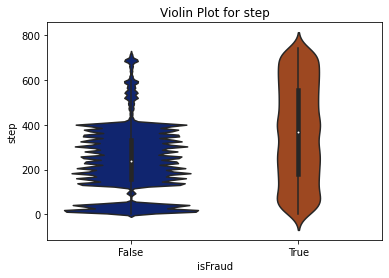

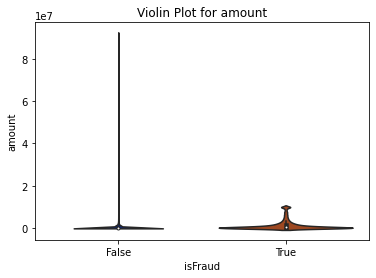

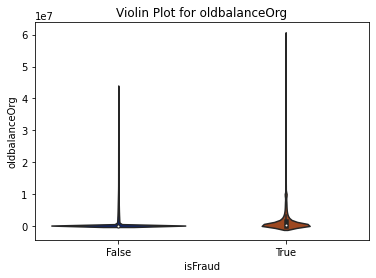

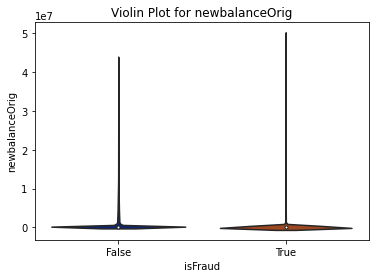

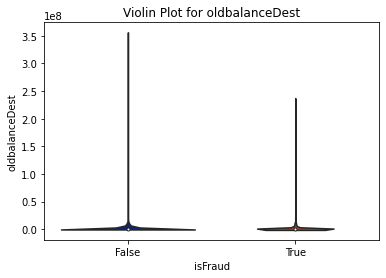

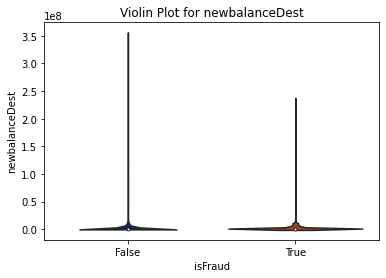

In [20]:
#VIOLIN PLOTS
data_numonly = data.loc[:,~data.columns.isin(['type','nameOrig','nameDest'])] #Re-run this so this cell is standalone
for col in data_numonly.columns:
    if not 'isFraud' in str(col):
        sns.violinplot(data=data_numonly,x='isFraud',y=col,palette='dark').set(title='Violin Plot for {}'.format(str(col)))
        plt.show()

In [12]:
###### CANNOT DO BECAUSE I NEED TO TAKE INTO ACCOUNT THE 0's

#Log Violin Plot
# data_numonly2 = data.loc[:,~data.columns.isin(['type','nameOrig','nameDest'])] #Re-run this so this cell is standalone
# #Create new columns
# data_numonly2['log_amount'] = np.log(data_numonly2['amount']) #log(amount)
# data_numonly2['log_oldbalanceOrg'] = np.log(data_numonly2['oldbalanceOrg']) #log(oldbalanceOrg)
# data_numonly2['log_newbalanceOrig'] = np.log(data_numonly2['newbalanceOrig']) #log(newbalanceOrig)
# data_numonly2['log_oldbalanceDest'] = np.log(data_numonly2['oldbalanceDest']) #log(oldbalanceDest)
# data_numonly2['log_newbalanceDest'] = np.log(data_numonly2['newbalanceDest']) #log(newbalanceDest)

# # for col in data_numonly2.columns:
# #     if 'log' in str(col):
# #         sns.violinplot(data=data_numonly,x='isFraud',y=col,palette='dark').set(title='Violin Plot for {}'.format(str(col)))
# #         plt.show()


# data_numonly2['log_amount']

In [22]:
#Take a closer look at outliers for oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest
OBO_outliers = data.loc[data.oldbalanceOrg>107315.2,"oldbalanceOrg"]
NBO_outliers = data.loc[data.newbalanceOrig>144258.4,"newbalanceOrig"]
OBD_outliers = data.loc[data.oldbalanceDest>943036.7,"oldbalanceDest"]
NBD_outliers = data.loc[data.newbalanceDest>1111909,"newbalanceDest"]
outlier_list = [OBO_outliers, NBO_outliers, OBD_outliers, NBD_outliers]

0


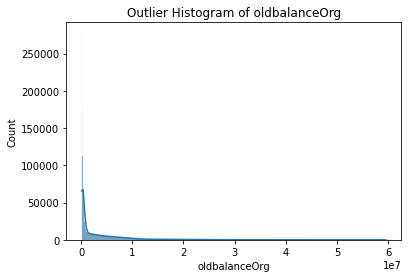

1


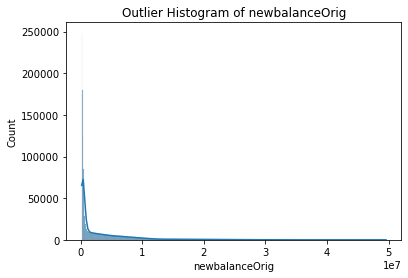

2


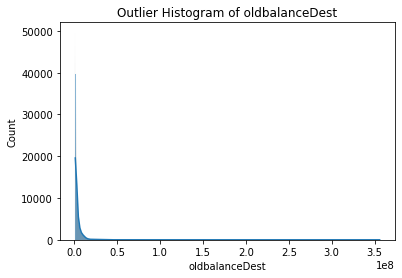

3


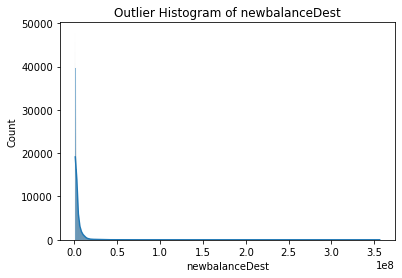

In [50]:
#Histogram of above outliers
for i in range(len(outlier_list)):
    print(i)
    sns.histplot(x=outlier_list[i], kde=True).set(title='Outlier Histogram of {}'.format(str(outlier_list[i].name)))
    plt.show()
    #sns.histplot(data=dataF,x=col,kde=True).set(title='Fraud Histogram of {}'.format(str(col)))

In [12]:
#Only looking at the respective column and re-ordering them
OBO_data = data.loc[:,['oldbalanceOrg','isFraud']].sort_values(by=["oldbalanceOrg"],ignore_index=False)
OBO_data = OBO_data.reset_index(level=0, drop=True)
NBO_data = data.loc[:,['newbalanceOrig','isFraud']].sort_values(by=["newbalanceOrig"],ignore_index=False)
NBO_data = NBO_data.reset_index(level=0, drop=True)
OBD_data = data.loc[:,['oldbalanceDest','isFraud']].sort_values(by=["oldbalanceDest"],ignore_index=False)
OBD_data = OBD_data.reset_index(level=0, drop=True)
NBD_data = data.loc[:,['newbalanceDest','isFraud']].sort_values(by=["newbalanceDest"],ignore_index=False)
NBD_data = NBD_data.reset_index(level=0, drop=True)

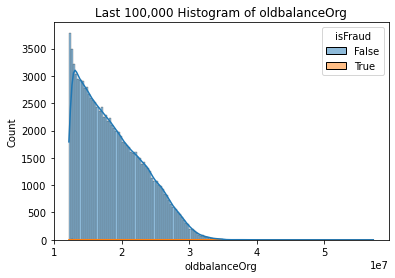

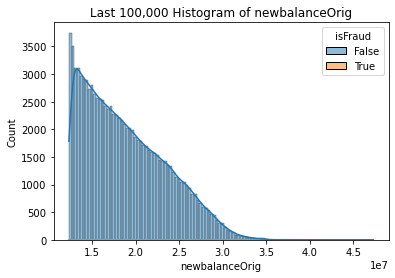

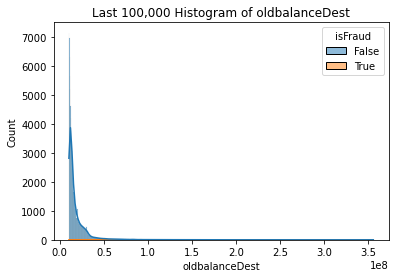

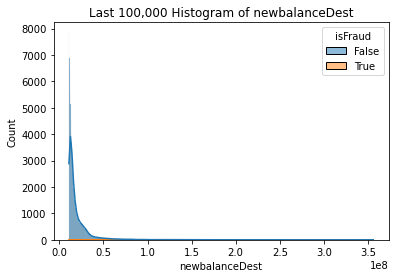

In [72]:
#Top 100,000 points for OBO, NBO, OBD, and NBD
datal = 6362619 #end of array
datal2 = 6262619 #100,000 before end of array

#Last 100,000 of each column
OBOtop = OBO_data[datal2:datal]
NBOtop = NBO_data[datal2:datal]
OBDtop = OBD_data[datal2:datal]
NBDtop = NBD_data[datal2:datal]

top_list = [OBOtop,NBOtop,OBDtop,NBDtop]



for i in range(len(top_list)):
    curr_df = top_list[i]
    for col in [x for x in curr_df.columns if x != 'isFraud']:
        sns.histplot(data=curr_df, x=col, kde=True, hue='isFraud').set(title='Last 100,000 Histogram of {}'.format(str(col)))
        plt.show()

In [13]:
#Remove the 0's
OBO_data2 = OBO_data.loc[OBO_data.oldbalanceOrg > 0]
NBO_data2 = NBO_data.loc[NBO_data.newbalanceOrig > 0]
OBD_data2 = OBD_data.loc[OBD_data.oldbalanceDest > 0]
NBD_data2 = NBD_data.loc[NBD_data.newbalanceDest > 0]

#Separate between Fraud and No Fraud
OBO_F = OBO_data2.loc[OBO_data2.isFraud==True]
OBO_NF = OBO_data2.loc[OBO_data2.isFraud==False]
NBO_F = NBO_data2.loc[NBO_data2.isFraud==True]
NBO_NF = NBO_data2.loc[NBO_data2.isFraud==False]
OBD_F = OBD_data2.loc[OBD_data2.isFraud==True]
OBD_NF = OBD_data2.loc[OBD_data2.isFraud==False]
NBD_F = NBD_data2.loc[NBD_data2.isFraud==True]
NBD_NF = NBD_data2.loc[NBD_data2.isFraud==False]

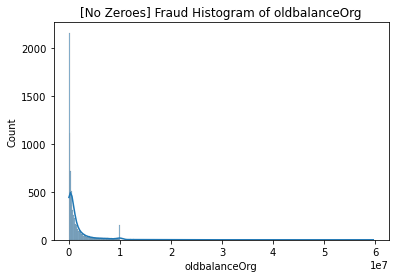

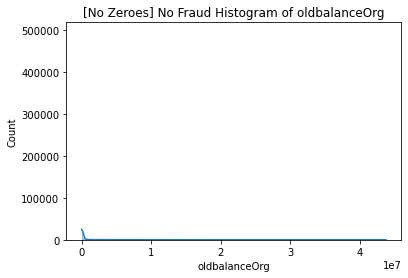

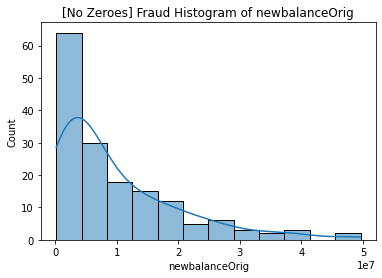

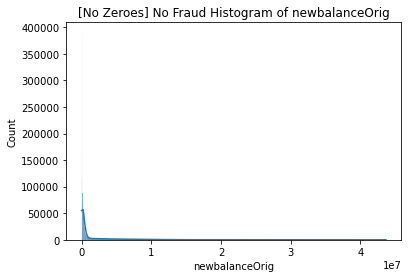

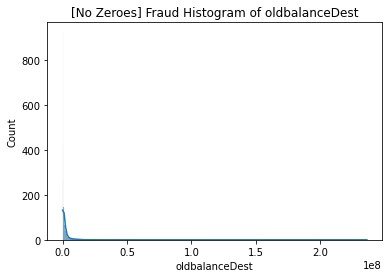

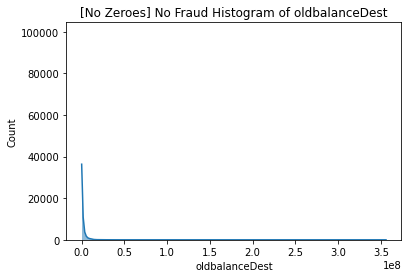

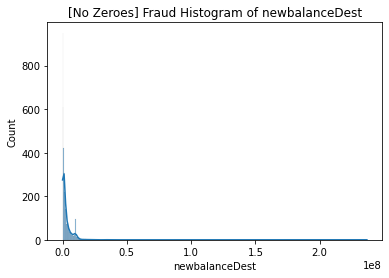

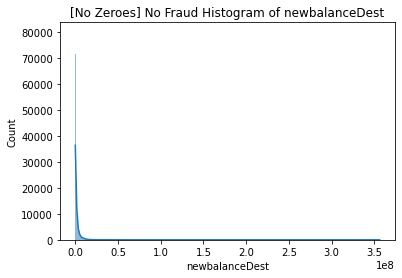

In [82]:
# REMOVE 0's AND PLOT HISTOGRAMS BY FRAUD AND NO FRAUD

column_names = ["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]


for col in column_names:
    if col == column_names[0]:
        sns.histplot(data=OBO_F,x=col,kde=True).set(title='[No Zeroes] Fraud Histogram of {}'.format(str(col)))
        plt.show()
        sns.histplot(data=OBO_NF,x=col,kde=True).set(title='[No Zeroes] No Fraud Histogram of {}'.format(str(col)))
        plt.show()
    elif col == column_names[1]:
        sns.histplot(data=NBO_F,x=col,kde=True).set(title='[No Zeroes] Fraud Histogram of {}'.format(str(col)))
        plt.show()
        sns.histplot(data=NBO_NF,x=col,kde=True).set(title='[No Zeroes] No Fraud Histogram of {}'.format(str(col)))
        plt.show()
    elif col == column_names[2]:
        sns.histplot(data=OBD_F,x=col,kde=True).set(title='[No Zeroes] Fraud Histogram of {}'.format(str(col)))
        plt.show()
        sns.histplot(data=OBD_NF,x=col,kde=True).set(title='[No Zeroes] No Fraud Histogram of {}'.format(str(col)))
        plt.show()
    else:
        sns.histplot(data=NBD_F,x=col,kde=True).set(title='[No Zeroes] Fraud Histogram of {}'.format(str(col)))
        plt.show()
        sns.histplot(data=NBD_NF,x=col,kde=True).set(title='[No Zeroes] No Fraud Histogram of {}'.format(str(col)))
        plt.show()




In [15]:
# CREATE TABLES OF THE 4 VARIABLES SPLIT BY FRAUD AND NO FRAUD WITHOUT 0's
column_names = ["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]


for col in column_names:
    if col == column_names[0]:
        print("===== FRAUD {} =====".format(col))
        print(OBO_F[col].describe().T)
        print()
        print("===== NO FRAUD {} =====".format(col))
        print(OBO_NF[col].describe().T)
        print()
    elif col == column_names[1]:
        print("===== FRAUD {} =====".format(col))
        print(NBO_F[col].describe().T)
        print()
        print("===== NO FRAUD {} =====".format(col))
        print(NBO_NF[col].describe().T)
        print()
    elif col == column_names[2]:
        print("===== FRAUD {} =====".format(col))
        print(OBD_F[col].describe().T)
        print()
        print("===== NO FRAUD {} =====".format(col))
        print(OBD_NF[col].describe().T)
        print()
    else:
        print("===== FRAUD {} =====".format(col))
        print(NBD_F[col].describe().T)
        print()
        print("===== NO FRAUD {} =====".format(col))
        print(NBD_NF[col].describe().T)
        print()

===== FRAUD oldbalanceOrg =====
count    8.172000e+03
mean     1.657944e+06
std      3.554679e+06
min      6.380000e+01
25%      1.275643e+05
50%      4.437883e+05
75%      1.532243e+06
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

===== NO FRAUD oldbalanceOrg =====
count    4.251999e+06
mean     1.244622e+06
std      3.456100e+06
min      5.000000e-02
25%      1.361200e+04
50%      5.124200e+04
75%      2.996872e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

===== FRAUD newbalanceOrig =====
count    1.600000e+02
mean     9.875754e+06
std      1.016499e+07
min      1.755976e+05
25%      2.604515e+06
50%      5.793376e+06
75%      1.447791e+07
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

===== NO FRAUD newbalanceOrig =====
count    2.752894e+06
mean     1.975806e+06
std      4.187588e+06
min      1.000000e-02
25%      5.069382e+04
50%      2.078367e+05
75%      1.501169e+06
max      4.368662e+07
Name: newbalanceOrig, dtype: float64

===== FRAU

In [14]:
#Split the full datasets between F and NF
OBO_dataF = OBO_data.loc[OBO_data.isFraud == True]
OBO_dataNF = OBO_data.loc[OBO_data.isFraud == False]
NBO_dataF = NBO_data.loc[NBO_data.isFraud == True]
NBO_dataNF = NBO_data.loc[NBO_data.isFraud == False]
OBD_dataF = OBD_data.loc[OBD_data.isFraud == True]
OBD_dataNF = OBD_data.loc[OBD_data.isFraud == False]
NBD_dataF = NBD_data.loc[NBD_data.isFraud == True]
NBD_dataNF = NBD_data.loc[NBD_data.isFraud == False]

In [18]:
# CREATE TABLES OF THE 4 VARIABLES SPLIT BY FRAUD AND NO FRAUD WITH 0's
column_names = ["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]


for col in column_names:
    if col == column_names[0]:
        print("===== FRAUD {} =====".format(col))
        print(OBO_dataF[col].describe().T)
        print()
        print("===== NO FRAUD {} =====".format(col))
        print(OBO_dataNF[col].describe().T)
        print()
    elif col == column_names[1]:
        print("===== FRAUD {} =====".format(col))
        print(NBO_dataF[col].describe().T)
        print()
        print("===== NO FRAUD {} =====".format(col))
        print(NBO_dataNF[col].describe().T)
        print()
    elif col == column_names[2]:
        print("===== FRAUD {} =====".format(col))
        print(OBD_dataF[col].describe().T)
        print()
        print("===== NO FRAUD {} =====".format(col))
        print(OBD_dataNF[col].describe().T)
        print()
    else:
        print("===== FRAUD {} =====".format(col))
        print(NBD_dataF[col].describe().T)
        print()
        print("===== NO FRAUD {} =====".format(col))
        print(NBD_dataNF[col].describe().T)
        print()

===== FRAUD oldbalanceOrg =====
count    8.213000e+03
mean     1.649668e+06
std      3.547719e+06
min      0.000000e+00
25%      1.258224e+05
50%      4.389835e+05
75%      1.517771e+06
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

===== NO FRAUD oldbalanceOrg =====
count    6.354407e+06
mean     8.328287e+05
std      2.887144e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.406900e+04
75%      1.069695e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

===== FRAUD newbalanceOrig =====
count    8.213000e+03
mean     1.923926e+05
std      1.965666e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

===== NO FRAUD newbalanceOrig =====
count    6.354407e+06
mean     8.559702e+05
std      2.924987e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.447307e+05
max      4.368662e+07
Name: newbalanceOrig, dtype: float64

===== FRAU

In [21]:
#Look at data dataframe, and look at all instances of Fraud where oldbalanceOrg = 0
Zero_OBD_F = data.loc[(data.isFraud == True) & (data.oldbalanceOrg == 0),:]
Zero_OBD_F

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
724,1,CASH_OUT,416001.33,C749981943,0.0,0.0,C667346055,102.00,9291619.62,True
14861,8,CASH_OUT,181728.11,C2102265902,0.0,0.0,C789014007,11397.00,184477.77,True
25875,8,TRANSFER,1078013.76,C1026280121,0.0,0.0,C277510102,0.00,970749.68,True
77745,10,CASH_OUT,277970.88,C489647033,0.0,0.0,C571514738,0.00,277970.88,True
138559,11,TRANSFER,1933920.80,C1706582969,0.0,0.0,C461905695,1283762.85,3217683.65,True
169998,12,CASH_OUT,149668.66,C227115333,0.0,0.0,C460735540,44170.11,193838.76,True
178668,12,CASH_OUT,222048.71,C265790428,0.0,0.0,C1700442291,2979.00,225027.71,True
200845,13,CASH_OUT,454859.39,C1274887619,0.0,0.0,C2146670328,0.00,454859.39,True
291459,15,CASH_OUT,95428.32,C947728507,0.0,0.0,C1720721903,0.00,95428.32,True
296686,15,CASH_OUT,39713.28,C1404885898,0.0,0.0,C1795377601,1274866.51,1314579.79,True


[Text(0.5, 1.0, '[HISTOGRAM] Amount of Fraud Transactions Where OBD=0')]

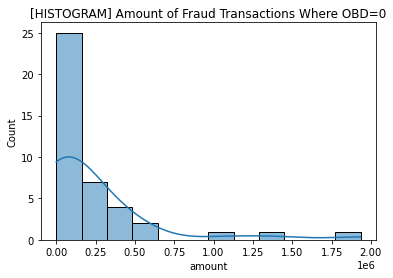

In [22]:
sns.histplot(data=Zero_OBD_F,x='amount',kde=True).set(title="[HISTOGRAM] Amount of Fraud Transactions Where OBD=0")

In [60]:
#NEED TO RECREATE THE OBO_data VARIABLES SO THEY ARE NOT ORDERED BY VALUE
slimdataF = data.loc[data.isFraud == True,['step','amount','type','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]
slimdataNF = data.loc[data.isFraud == False,['step','amount','type','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]

#Are there any instances where the OG account has more after the transaction? NO!
# DIFF1 = slimdata.oldbalanceOrg - slimdata.newbalanceOrig
# DIFF1.loc[DIFF1<0] 


#How many times are the OG accounts drained to 0? 8053 times or 98.05% of the time
# slimdata.loc[slimdata.newbalanceOrig == 0,:].shape

#Lets take a look at all the times where newbalanceOrig >0 
# pd.set_option('display.max_rows',None) #This allows us to see all rows of a dataframe (default is 10)
# slimdata.loc[slimdata.newbalanceOrig > 0,:]
# pd.set_option('display.max_rows',10) #Reset back to 10


#Understanding the relationship between steps, nameOrig, and nameDest
#organized_data = data.sort_values(by=["nameOrig","step"]) #with original index values
#organized_data2 = data.sort_values(by=["nameOrig","step"],ignore_index=True)#without original index values

#How many unique nameOrig's and nameDest are there out of 6,362,620 rows?
#len(organized_data2.nameOrig.unique()) #6,353,307
#len(organized_data2.nameDest.unique()) #2,722,362

In [64]:
#Check the first letter of nameOrig and nameDest
NO_FL = data.nameOrig.str[0] #Grabs the first character across all columns
ND_FL = data.nameDest.str[0] #Same as above


print("======== nameOrig ========")
print(NO_FL.value_counts())
print()
print("======== nameDest ========")
print(ND_FL.value_counts())
print()

======== nameOrig ========
C    6362620
Name: nameOrig, dtype: int64

======== nameDest ========
C    4211125
M    2151495
Name: nameDest, dtype: int64



In [67]:
dataF = data.loc[data.isFraud==True,:]
dataNF = data.loc[data.isFraud==False,:]

NO_FL_F = dataF.nameOrig.str[0]
NO_FL_NF = dataNF.nameOrig.str[0]
ND_FL_F = dataF.nameDest.str[0]
ND_FL_NF = dataNF.nameDest.str[0]

print("======== FRAUD - nameOrig & nameDest ========")
print(NO_FL_F.value_counts())
print(ND_FL_F.value_counts())
print()
print("======== NO FRAUD - nameOrig & nameDest ========")
print(NO_FL_NF.value_counts()) 
print(ND_FL_NF.value_counts())
print()



======== FRAUD - nameOrig & nameDest ========
C    8213
Name: nameOrig, dtype: int64
C    8213
Name: nameDest, dtype: int64

======== NO FRAUD - nameOrig & nameDest ========
C    6354407
Name: nameOrig, dtype: int64
C    4202912
M    2151495
Name: nameDest, dtype: int64



In [68]:
#Need to look at # of unique nameOrigs and nameDests by Fraud and No Fraud

NOUF = dataF.nameOrig.unique()
NOUNF = dataNF.nameOrig.unique()
NDUF = dataF.nameDest.unique()
NDUNF = dataNF.nameDest.unique()


print("# of unique nameOrig's with Fraud: ",len(NOUF))
print()
print("# of unique nameDest's with Fraud: ",len(NDUF))
print()
print("# of unique nameOrig's with No Fraud: ",len(NOUNF))
print()
print("# of unique nameDest's with No Fraud: ",len(NDUNF))
print()

# of unique nameOrig's with Fraud:  8213

# of unique nameDest's with Fraud:  8169

# of unique nameOrig's with No Fraud:  6345122

# of unique nameDest's with No Fraud:  2719685



In [74]:
#Compare % of times oldbalanceDest > oldbalanceOrg for Fraud and No Fraud cases
old_GT_F = dataF.oldbalanceDest - dataF.oldbalanceOrg
new_GT_F = dataF.newbalanceDest - dataF.newbalanceOrig
old_GT_NF = dataNF.oldbalanceDest - dataNF.oldbalanceOrg
new_GT_NF = dataNF.newbalanceDest - dataNF.newbalanceOrig

#sum(old_GT_F > 0) #1442 (17.56%) cases of oldbalanceDest > oldbalanceOrg for Fraud
#sum(new_GT_F > 0) #4122 (50.19%) cases of newbalanceDest > newbalanceOrig for Fraud
#sum(old_GT_NF > 0) #2,812,390 (44.26%) cases of oldbalanceDest > oldbalanceOrg for No Fraud
#sum(new_GT_NF > 0) #3,094,640 (48.7%) cases of newbalanceDest > newbalanceOrig for No Fraud


# print("# of unique nameOrig's with Fraud: ",len(NOUF))
# print()
# print("# of unique nameDest's with Fraud: ",len(NDUF))
# print()
# print("# of unique nameOrig's with No Fraud: ",len(NOUNF))
# print()
# print("# of unique nameDest's with No Fraud: ",len(NDUNF))
# print()

3094640

In [6]:
#Missing values in the dataset

#data.isna().sum() #There is literally no missing values in any of the columns

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
#Save data variable so we can use it in the next script

pickle_list = [data]
f = open('CCF_EDA_Data.pckl','wb')
pickle.dump(pickle_list,f)
f.close()
